In [891]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numdifftools as nd

In [892]:
df = pd.read_csv('./../data/price_elasticity_data.csv')

In [893]:
df.isnull().sum()

Product              0
Menu_Price           0
Pizza_Count          0
Profit_Percentage    0
dtype: int64

rename columns

In [894]:
names = {'Menu_Price': 'unit_price', 'Pizza_Count': 'quantity', 'Profit_Percentage': 'profit_percentage'}
df.rename(columns=names, inplace=True)

# calculate additional features

In [895]:
df['gross_margin'] = df['profit_percentage'] / 100
df['gross_profit'] = df['unit_price'] * (1 - df['gross_margin'])
df['cost'] = df['unit_price'] - df['gross_profit']

# Subset the dataframe for 'Individuale' product and create a copy

In [896]:
individuale_df = df[df['Product'] == 'Individuale'].copy()

In [897]:
individuale_df.isnull().sum()

Product              0
unit_price           0
quantity             0
profit_percentage    0
gross_margin         0
gross_profit         0
cost                 0
dtype: int64

In [898]:
individuale_df['unit_price'].max()

np.float64(18.61)

# Fit linear regression model

In [899]:
# extract the x and y values
x_value = individuale_df['unit_price']
y_value = individuale_df['quantity']

# ensure x and y are of the same length
assert len(x_value) == len(y_value), "x and y must have the same length"

# add a constant to the independent variable (price)
X = add_constant(x_value)

# fit the regression model
model = sm.OLS(y_value, X)
individuale_result = model.fit()

# print the summary of the regression model
print(individuale_result.summary())

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           8.21e-16
Time:                        14:18:36   Log-Likelihood:                -3.0430
No. Observations:                  71   AIC:                             10.09
Df Residuals:                      69   BIC:                             14.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6425      0.147     45.114      0.0

# Analysis

The output provided is from an Ordinary Least Squares (OLS) regression analysis. Here’s a detailed analysis of the key components of the results:

### Model Summary
- **Dep. Variable**: The dependent variable is `quantity`.
- **R-squared**: 0.612
  - This indicates that approximately 61.2% of the variability in the dependent variable (`quantity`) can be explained by the independent variable (`unit_price`).
- **Adj. R-squared**: 0.606
  - This adjusted R-squared value accounts for the number of predictors in the model. It is slightly lower than the R-squared value, which suggests that the model fits the data well but not perfectly.
- **F-statistic**: 108.6
  - This statistic tests the overall significance of the model.
- **Prob (F-statistic)**: 8.21e-16
  - This very low p-value (close to zero) indicates that the model is statistically significant. It suggests that there is a very low probability that the observed relationship between the dependent and independent variables is due to random chance.

### Coefficients
- **const (Intercept)**: 6.6425
  - This is the estimated value of the dependent variable (`quantity`) when the independent variable (`unit_price`) is zero.
- **unit_price**: -0.1639
  - This is the slope of the regression line. It indicates that for each one-unit increase in `unit_price`, the `quantity` decreases by approximately 0.1639 units.
- **Standard Errors**:
  - The standard error for the intercept (const) is 0.147.
  - The standard error for the `unit_price` coefficient is 0.016.
- **t-statistic**:
  - The t-value for the intercept is 45.114.
  - The t-value for the `unit_price` coefficient is -10.423.
- **P>|t|** (p-value):
  - The p-value for both the intercept and `unit_price` coefficient is 0.000, indicating that they are statistically significant at conventional significance levels (e.g., 0.05).
- **[0.025, 0.975]**:
  - These values represent the 95% confidence intervals for the coefficients. For the intercept, the confidence interval is [6.349, 6.936], and for the `unit_price` coefficient, it is [-0.195, -0.133].

### Diagnostics
- **Omnibus**: 50.515
  - This is a test for the presence of skewness and kurtosis in the residuals.
- **Prob(Omnibus)**: 0.000
  - This p-value indicates that the residuals are not normally distributed.
- **Jarque-Bera (JB)**: 162.982
  - This is another test for normality of residuals.
- **Prob(JB)**: 4.06e-36
  - This p-value also indicates that the residuals are not normally distributed.
- **Skew**: 2.320
  - This value indicates the asymmetry of the residual distribution. A positive value indicates right skew.
- **Kurtosis**: 8.793
  - This value indicates the "tailedness" of the residual distribution. A value greater than 3 suggests heavy tails.
- **Durbin-Watson**: 0.214
  - This statistic tests for the presence of autocorrelation in the residuals. Values close to 2 suggest no autocorrelation; values substantially less than 2 suggest positive autocorrelation.
- **Cond. No.**: 45.8
  - This is a measure of multicollinearity. Values above 30 suggest potential multicollinearity problems.

### Interpretation
1. **Significance**:
   - Both the overall model and the individual coefficients are highly significant (p-value < 0.05).

2. **Model Fit**:
   - The R-squared value of 0.612 indicates that the model explains 61.2% of the variance in the quantity, which is a reasonably good fit.

3. **Coefficients**:
   - The intercept (const) is 6.6425, suggesting that when the `unit_price` is zero, the predicted `quantity` is 6.6425.
   - The `unit_price` coefficient is -0.1639, indicating a negative relationship between price and quantity. As the price increases, the quantity demanded decreases.

4. **Residual Analysis**:
   - The low Durbin-Watson value (0.214) suggests positive autocorrelation in the residuals, which may indicate that the model assumptions are not fully met.
   - The significant skewness and kurtosis, as indicated by the Omnibus and Jarque-Bera tests, suggest that the residuals are not normally distributed. This could affect the reliability of the model’s inference.

### Conclusion
- The model suggests a significant negative relationship between unit price and quantity demanded. 
- However, the residuals exhibit signs of non-normality and autocorrelation, which suggests that while the model explains a good portion of the variance. 
- There may be other factors or a different model structure (e.g., including additional predictors or using a different model specification) that could better capture the relationship between the variables.

# Get prediction values

In [900]:
predictions = individuale_result.predict(X)

Add predictions to the dataframe

In [901]:
individuale_df['predictions'] = predictions

Create a scatter plot with the regression line

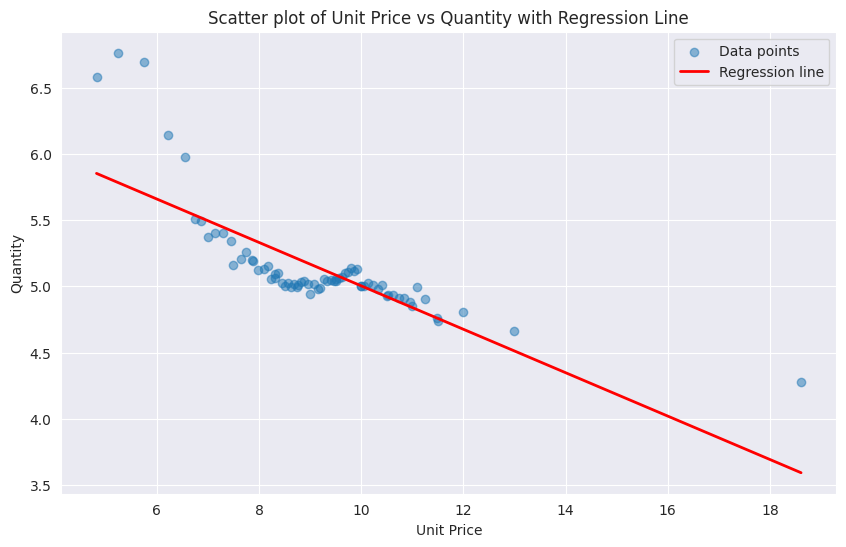

In [902]:
plt.figure(figsize=(10, 6))
plt.scatter(
    individuale_df['unit_price'], 
    individuale_df['quantity'], 
    alpha=0.5, 
    label='Data points'
)
plt.plot(
    individuale_df['unit_price'], 
    predictions, 
    color='red', 
    linewidth=2, 
    label='Regression line'
)
plt.title('Scatter plot of Unit Price vs Quantity with Regression Line')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

The regression line represents the relationship between unit rice and quantity demanded as modelled by simple linear regression. We can use it to derive our Price elasticity of demand (PED)

The regression line can be expressed as:
$$\text{Quantity} = \alpha + \beta \times \text{Price}$$

where:
- $\alpha$ is the intercept of the line.
- $\beta$ is the slope of the regression line

From our regression summary we know that:
- $\alpha = 6.6425$
- $\beta = -0.1639$

# Access alpha and beta directly from the fitted model

In [903]:
alpha = individuale_result.params['const']
alpha

np.float64(6.642495134583411)

In [904]:
beta = individuale_result.params['unit_price']
beta

np.float64(-0.16389523727683825)

In [905]:
# Calculate mean price and mean quantity
individuale_mean_price = np.mean(individuale_df['unit_price'])
individuale_mean_quantity = np.mean(individuale_df['quantity'])

price elasticity of demand. In general terms we can express this algebraically as:

$$\text{PED} = \dfrac{\Delta{Q}/Q}{\Delta{P}/P}$$

Where:
- $\Delta{Q}$ is the change in quantity demanded.
- $Q$ is the initial quantity demanded.
- $\Delta{P}$ is the change in price.
- $P$ is the initial price.

# Calculate PED

In [906]:
ped = beta * (individuale_mean_price / individuale_mean_quantity)
print(f'Price Elasticity of Demand: {ped}')

Price Elasticity of Demand: -0.2921031559792944


individuale is more elastic than Communita

# plot profit curve
we want to know at what price point we maximise gross profit

In [907]:
# Calculate the gross profit based on the predictions
individuale_df['gross_profit_predictions'] = (individuale_df['unit_price'] - individuale_df['cost']) * individuale_df['predictions']

# Find the price that maximizes gross profit

In [908]:
optimal_price = individuale_df.loc[individuale_df['gross_profit_predictions'].idxmax(), 'unit_price']
max_gross_profit = individuale_df['gross_profit_predictions'].max()
optimal_quantity = individuale_df.loc[individuale_df['gross_profit_predictions'].idxmax(), 'predictions']

In [909]:
def gross_profit_function(price):
    """
    Define the gross profit function based on the regression model
    :param price: 
    :return: 
    """
    return (price - mean_cost) * (individuale_result.params['const'] + individuale_result.params['unit_price'] * price)

Calculate the first derivative (slope) at the optimal price

In [910]:
derivative_function = nd.Derivative(gross_profit_function)
slope_at_optimal_price = derivative_function(optimal_price)

first derivative given point and slope

In [911]:
# Given point and slope
x1, y1 = 18.61, 29.49
slope = 1.2381578854600968
intercept = y1 - slope * x1  # Calculate y-intercept
x_vals = np.linspace(individuale_df['unit_price'].min(), individuale_df['unit_price'].max(), 100)  # Generate x values for the line
y_vals = slope * x_vals + intercept  # Calculate y values using the line equation

# Plot the original gross profit curve

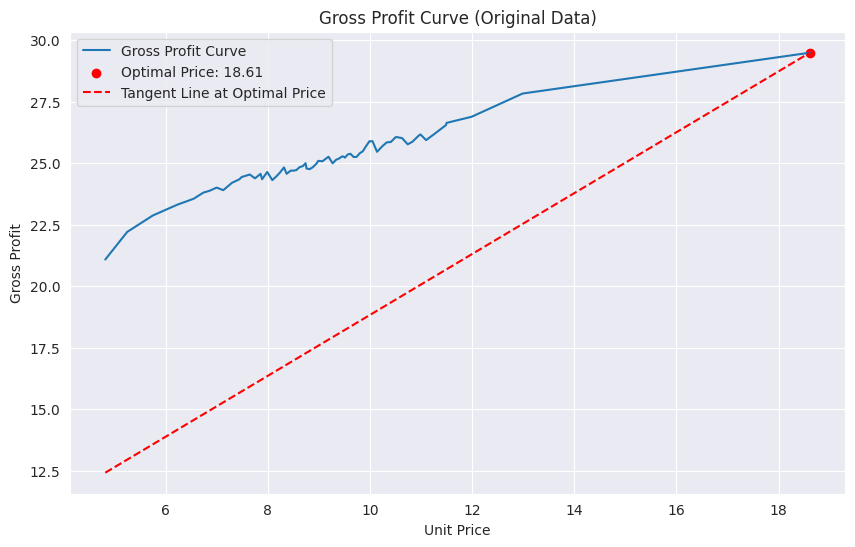

In [912]:
plt.figure(figsize=(10, 6))
plt.plot(
    individuale_df['unit_price'], 
    individuale_df['gross_profit_predictions'], 
    label='Gross Profit Curve'
)
plt.scatter(
    optimal_price, 
    max_gross_profit, 
    color='red', 
    label=f'Optimal Price: {optimal_price:.2f}'
)
plt.plot(
    x_vals, 
    y_vals, 
    color='red', 
    linestyle='--', 
    label=f'Tangent Line at Optimal Price'
)
plt.title('Gross Profit Curve (Original Data)')
plt.xlabel('Unit Price')
plt.ylabel('Gross Profit')
plt.legend()
plt.grid(True)
plt.show()

Print the optimal price and slope at that point

In [913]:
print(f'Optimal Price (Original): {optimal_price}')
print(f'Optimal Quantity (Original): {round(optimal_quantity, 0)}')
print(f'Maximum Gross Profit: {round(max_gross_profit, 2)}')
print(f'Slope of the Gross Profit Function at Optimal Price: {slope_at_optimal_price}')

Optimal Price (Original): 18.61
Optimal Quantity (Original): 4.0
Maximum Gross Profit: 29.49
Slope of the Gross Profit Function at Optimal Price: 1.2381578854600968


# Observations

# Extend the predictions
Create a new range of unit prices extending beyond the observed data

In [914]:
new_unit_prices = np.linspace(individuale_df['unit_price'].min(), 40, 100)
new_X = sm.add_constant(new_unit_prices)

Predict the quantities for the new range of unit prices

In [915]:
new_predictions = individuale_result.predict(new_X)

Calculate the gross profit for the new unit prices. Assuming cost remains constant, using the mean cost from the original data

In [916]:
mean_cost = individuale_df['cost'].mean()
new_gross_profits = (new_unit_prices - mean_cost) * new_predictions

Find the price that maximizes gross profit

In [917]:
max_index = np.argmax(new_gross_profits)
optimal_price = new_unit_prices[np.argmax(new_gross_profits)]
max_gross_profit = new_gross_profits.max()
optimal_quantity_extended = new_predictions[max_index]

In [918]:
def extended_gross_profit_function(price):
    """
    Define the gross profit function based on the regression model
    :param price: 
    :return: 
    """
    return (price - mean_cost) * (individuale_result.params['const'] + individuale_result.params['unit_price'] * price)

Calculate the slope of first derivative at the optimal price

In [ ]:
derivative_function = nd.Derivative(extended_gross_profit_function)
slope_at_optimal_price_extended = derivative_function(optimal_price)

# Plot the extended gross profit curve

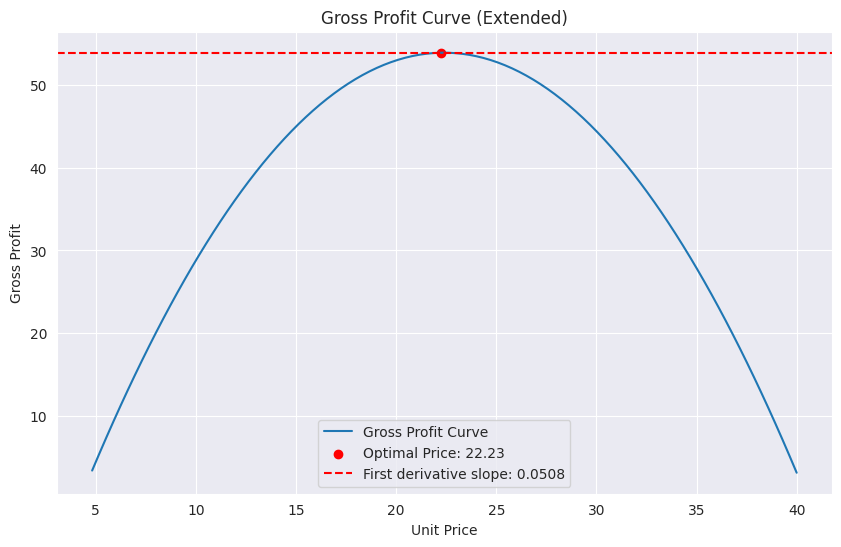

In [919]:
plt.figure(figsize=(10, 6))
plt.plot(new_unit_prices, new_gross_profits, label='Gross Profit Curve')
plt.scatter(
    optimal_price, 
    max_gross_profit, 
    color='red', 
    label=f'Optimal Price: {optimal_price:.2f}'
)
plt.axhline(
    y=max_gross_profit, 
    color='red', 
    linestyle='--', 
    label=f'First derivative slope: {slope_at_optimal_price_extended:.4f}'
)
plt.title('Gross Profit Curve (Extended)')
plt.xlabel('Unit Price')
plt.ylabel('Gross Profit')
plt.legend()
plt.grid(True)
plt.savefig('./../plots/individuale_ext_gp_curve')
plt.show()

# Print the optimal price and maximum gross profit

In [920]:
print(f'Optimal Price: {round(optimal_price, 2)}')
print(f'Optimal Quantity (Extended): {round(optimal_quantity_extended, 0)}')
print(f'Maximum Gross Profit: {round(max_gross_profit, 2)}')
print(f'Slope of the Gross Profit Function at Optimal Price (Extended): {slope_at_optimal_price_extended}')  # Print the optimal price and slope at that point

Optimal Price: 22.23
Optimal Quantity (Extended): 3.0
Maximum Gross Profit: 53.94
Slope of the Gross Profit Function at Optimal Price (Extended): 0.050794834150056825


# Analysis
So, on the face of it, the optimal price point is 22.23 which is confirmed by the slope of the first derivative, which is very close to 0. 

However, because we're making predictions outside the dataset, it can only be considered a hypothesis at this point. We have no data to substantiate it. We should set up an experiment to gather more data about sales quantities at higher price points.

- Hypothesis ($H_1$): The optimal unit price that maximises gross profit is 22.23.
- Null Hypothesis ($H_0$): The optimal unit price that maximises gross profit is different from 22.23.

In [ ]:
# todo: use plotly for the graphs we we can see price and quantity at different points using hover text, 
# todo: update analysis